# Worldwide Future Power Consumption Prediction

## Data Exploration

***

### Data Explanation

Two different datasets are used in this project and both of them are obtained from Kaggle.   
The Datasets are as followes:   
**1. Global Electricity Statistics (1980-2021):**   
> https://www.kaggle.com/datasets/akhiljethwa/global-electricity-statistics   
The dataset represents yearly contrywise electricity measurement of 7 different metrics from 1980-2021.            
    1. **Net Generation (billion kWh):** Electricity generation/production   
    2. **Net Consumption (billion kWh):** Electricity consumption   
    3. **Imports (billion kWh):** Electricity imports   
    4. **Exports (billion kWh):** Electricity exports   
    5. **Net Imports (billion kWh):** Electricity net imports   
    6. **Installed Capacity (million kW):** The maximum amount of electricity that a generating station (also known as a power plant) can produce under specific conditions designated by the manufacturer   
    7. **Distribution Losses (billion kWh):** Transmission and distribution losses refer to the losses that occur in                       transmission of electricity between the sources of supply and points of distribution.   
        
**2. World Population by Country:**
> https://www.kaggle.com/datasets/rajkumarpandey02/2023-world-population-by-country   
  Contrywise population with metrics like net change and population growth rate which can be used to predict future               electricity requirements.

***

**Importing Libraries**

In [27]:
# For Data Analysis
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import ipywidgets
from ipywidgets import interact, interactive, widgets, HBox, fixed
from IPython.display import HTML
import warnings
from pandas.plotting import register_matplotlib_converters

# Aditional import
import datetime
import os

In [28]:
warnings.filterwarnings('ignore')
layout = widgets.Layout(width = '400px', height = '30px')
pio.templates.default = "plotly_white"
%matplotlib inline

#### Data loading

**=>** Global Electricity Statistics

In [3]:
df_electricity = pd.read_csv(r"data\Global Electricity Statistics.csv")

In [4]:
df_electricity.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [5]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   1610 non-null   object
 1   Features  1610 non-null   object
 2   Region    1610 non-null   object
 3   1980      1582 non-null   object
 4   1981      1582 non-null   object
 5   1982      1582 non-null   object
 6   1983      1582 non-null   object
 7   1984      1582 non-null   object
 8   1985      1582 non-null   object
 9   1986      1582 non-null   object
 10  1987      1582 non-null   object
 11  1988      1582 non-null   object
 12  1989      1582 non-null   object
 13  1990      1582 non-null   object
 14  1991      1582 non-null   object
 15  1992      1582 non-null   object
 16  1993      1582 non-null   object
 17  1994      1582 non-null   object
 18  1995      1582 non-null   object
 19  1996      1582 non-null   object
 20  1997      1582 non-null   object
 21  1998      1582

In [6]:
for year in df_electricity.columns[3:]:
    if not df_electricity[df_electricity[year] == "ie"].empty:
        print(year)
        df_electricity = df_electricity[df_electricity[year] != "ie"]

2012
2020
2021


In [7]:
for year in df_electricity.columns[3:]:
    if not df_electricity[df_electricity[year] == "--"].empty:
        print(year)
        df_electricity = df_electricity[df_electricity[year] != "--"]

1980
1987
1991
1992
1993


In [8]:
df_electricity.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [9]:
df_electricity = df_electricity.drop_duplicates()

In [10]:
for idx, col in enumerate(df_electricity.columns):
    if idx < 3:
        df_electricity[col] = df_electricity[col].astype(str)
    else:
        df_electricity[col] = df_electricity[col].astype(float)

In [11]:
df_electricity.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,...,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1293.000000,1292.000000
mean,10.856473,11.104279,11.252451,11.763113,12.427488,12.968054,13.362936,14.023863,14.670830,15.550523,...,34.746357,36.011030,36.866249,37.807997,39.011096,40.279738,41.759737,42.535593,42.920068,45.195611
std,93.817356,95.104832,93.346839,96.432763,101.594093,104.021175,105.669515,109.856581,115.173824,124.032080,...,253.254913,266.689756,275.268511,281.649772,292.494157,307.697017,324.539829,335.498261,344.555528,371.017101
min,-26.080381,-33.086989,-29.254710,-35.253566,-39.575827,-40.889251,-34.540862,-44.407935,-36.709000,-41.869000,...,-47.663000,-50.875536,-67.190002,-64.062999,-63.800637,-62.146465,-62.966695,-57.667049,-57.584808,-44.836910
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.048000,0.055000,0.056710,0.062000,0.066495,0.066758,0.080000,0.084815,0.086500,0.097000,...,0.421500,0.453300,0.521500,0.535095,0.538054,0.583044,0.552087,0.633000,0.622000,0.644046
75%,1.308250,1.389000,1.565750,1.741750,1.801500,1.925000,1.900750,1.973750,2.154500,2.141500,...,6.966000,7.310092,7.411095,7.752015,7.915508,8.197027,8.458260,8.535076,8.603761,8.645879
max,2289.600364,2297.973338,2244.372487,2313.445686,2419.465367,2473.002120,2490.470952,2575.287667,2707.411178,2967.177014,...,4740.272580,5171.548020,5400.113560,5584.765637,5904.640151,6389.805784,6800.815757,7152.505896,7455.467185,8151.518231


In [12]:
df_electricity.isnull().sum()

Country      0
Features     0
Region       0
1980        22
1981        22
1982        22
1983        22
1984        22
1985        22
1986        22
1987        22
1988        22
1989        22
1990        22
1991        22
1992        22
1993        22
1994        22
1995        22
1996        22
1997        22
1998        22
1999        22
2000        22
2001        22
2002        22
2003        22
2004        22
2005        22
2006        22
2007        22
2008        22
2009        22
2010        22
2011        22
2012        22
2013        22
2014        22
2015        22
2016        22
2017        22
2018        22
2019        22
2020        25
2021        26
dtype: int64

In [13]:
df_electricity['Country'] = df_electricity['Country'].str.strip()
df_electricity = df_electricity[-df_electricity['Country'].isin([
    'Micronesia', 'Northern Mariana Islands', 'Tuvalu', 'U.S. Territories', 'Reunion', 'French Guiana', 'Guadeloupe', 'Martinique'
])]

df_electricity.isnull().sum()

Country     0
Features    0
Region      0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
dtype: int64

In [14]:
df_electricity.shape

(1288, 45)

In [15]:
df_population = pd.read_csv(r"data\countries-table.csv")

In [16]:
df_population.head()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


In [17]:
df_population = df_population.rename(columns = {'country': 'Country'})

In [18]:
df_population.head()

,Country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


In [19]:
df_population = df_population[["Country", "growthRate", "pop1980", "pop2000", "pop2010", "pop2022", "pop2023", "pop2030", "pop2050"]]

In [20]:
df_population.head()

,Country,growthRate,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,0.0081,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,-0.0002,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,0.0050,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,0.0074,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,0.0198,80624057,154369924,194454498,235824862,240485658,274029836,367808468


#### Data Transformation

In [21]:
# Converting wide dataset format to long format so that exploration can be done properly

df_electricity = df_electricity.melt(id_vars = ['Country', 'Features', 'Region'], value_name = 'Value', var_name='Year' )
df_electricity.head()

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683
1,Angola,net generation,Africa,1980,0.905
2,Benin,net generation,Africa,1980,0.005
3,Botswana,net generation,Africa,1980,0.443
4,Burkina Faso,net generation,Africa,1980,0.098


In [22]:
# pivot
df_electricity['Features'] = df_electricity['Features'].str.strip()
df_electricity = df_electricity.pivot_table(values = 'Value', index = ['Country', 'Region', 'Year'], columns = 'Features')
df_electricity.reset_index(inplace = True)

# check
df_electricity.head()

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
0,Afghanistan,Asia & Oceania,1980,0.06594,0.0,0.0,0.374,0.87606,0.942,0.0
1,Afghanistan,Asia & Oceania,1981,0.06944,0.0,0.0,0.427,0.92256,0.992,0.0
2,Afghanistan,Asia & Oceania,1982,0.06664,0.0,0.0,0.427,0.88536,0.952,0.0
3,Afghanistan,Asia & Oceania,1983,0.07000,0.0,0.0,0.450,0.93000,1.000,0.0
4,Afghanistan,Asia & Oceania,1984,0.07133,0.0,0.0,0.450,0.94767,1.019,0.0


#### Data Exploration

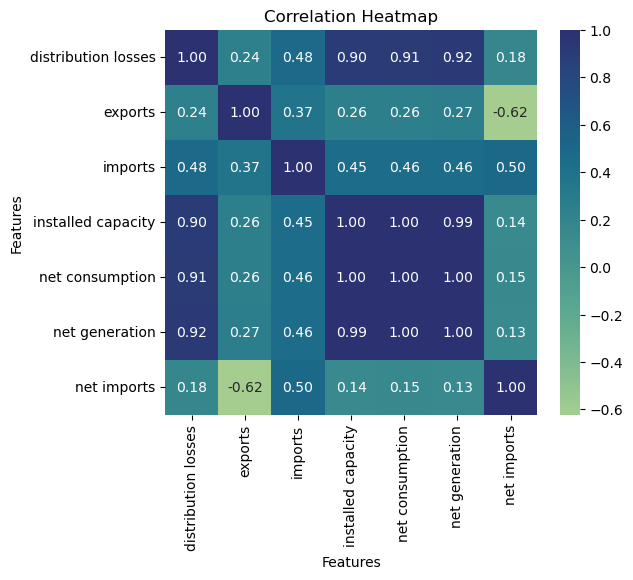

In [25]:
# correlation matrix

plt.figure(figsize = (6, 5), facecolor = 'white')
plt.title('Correlation Heatmap')
sns.heatmap(data = df_electricity.corr(numeric_only = True), cmap = 'crest', fmt = '0.2f', linecolor = 'black', annot = True)

plt.show()

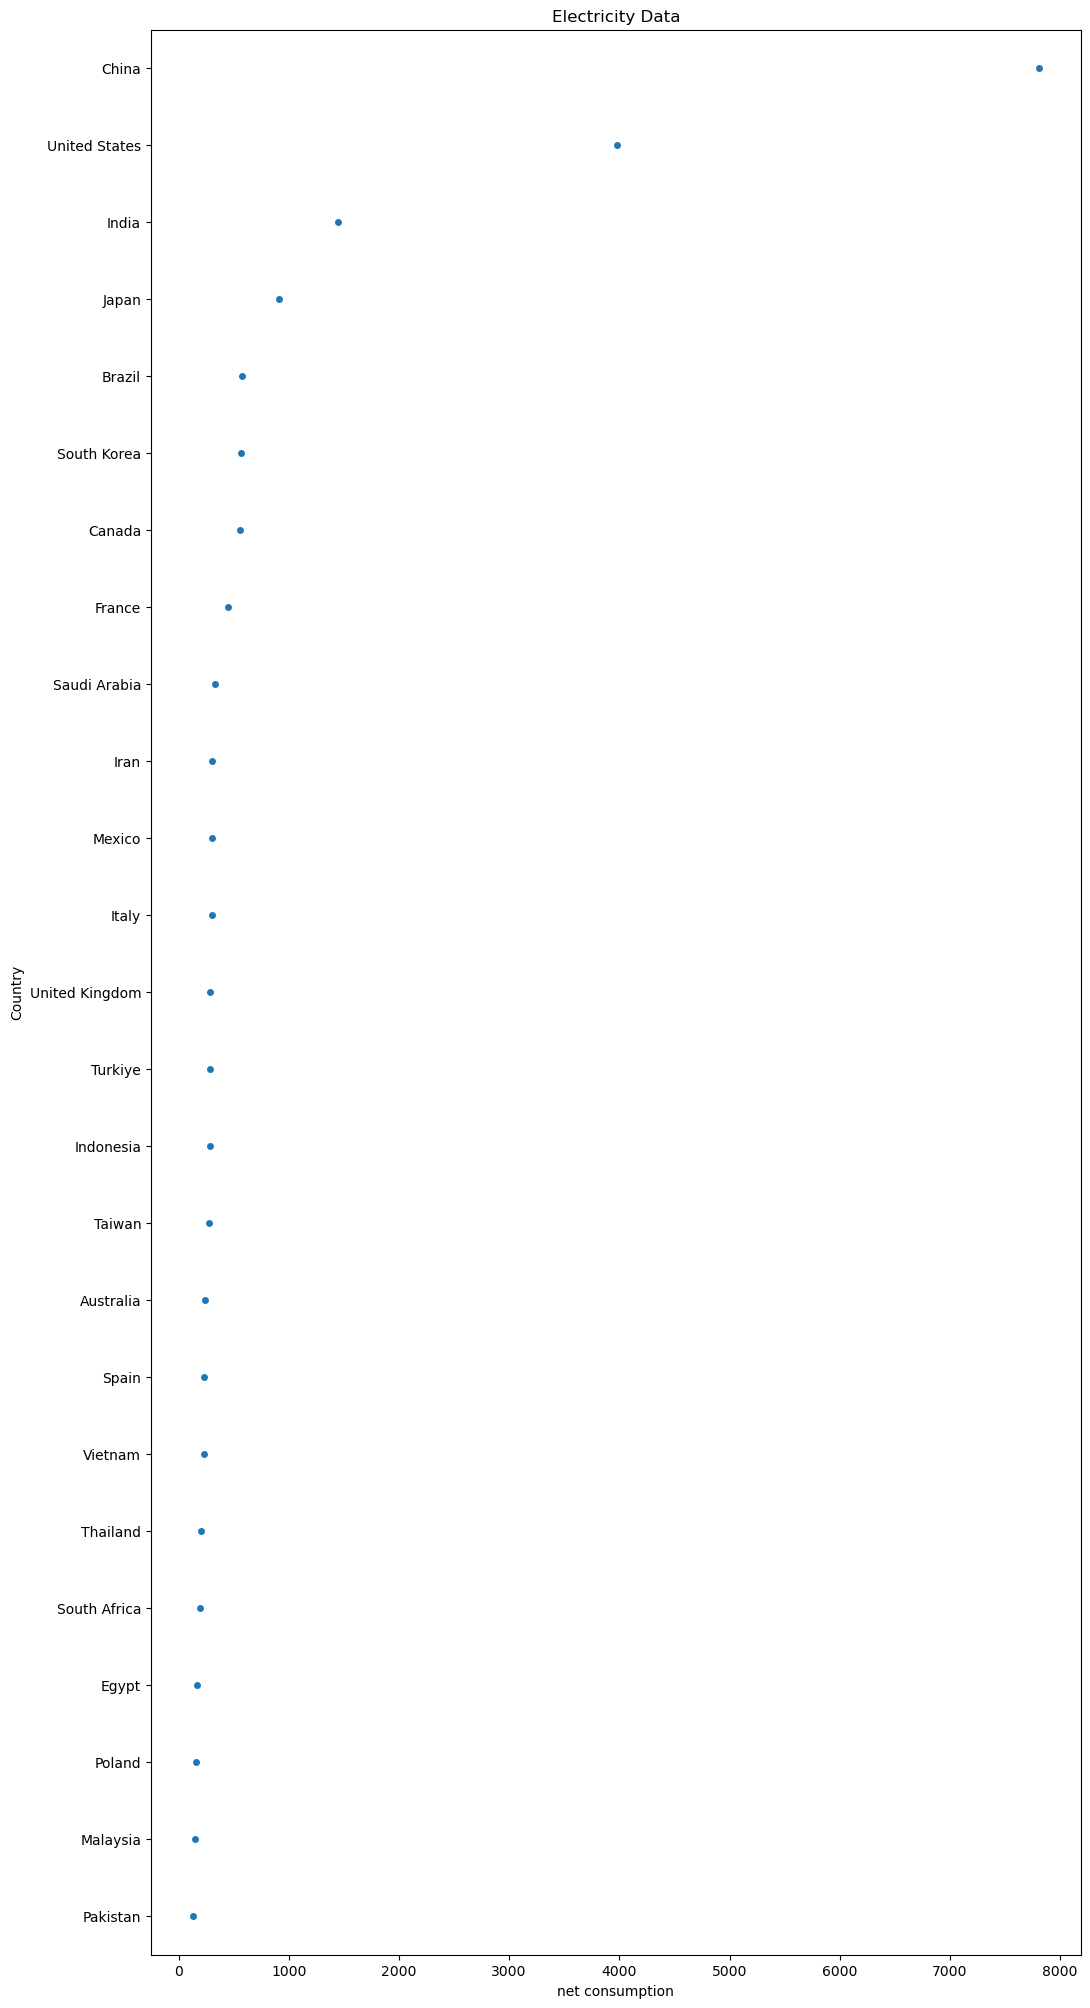

In [52]:
plt.figure(figsize = (12, 25), facecolor = 'white')
plt.title('Electricity Data')
sns.stripplot(data = df_electricity[df_electricity['Year'] == "2021"].sort_values(by = ['net consumption'], ascending = False)[:25], x = 'net consumption', y = "Country")
plt.show()

In [51]:
df_electricity[df_electricity['Year'] == "2021"].sort_values(by = ['net consumption'], ascending = False)[:25]

Features,Country,Region,Year,distribution losses,exports,imports,installed capacity,net consumption,net generation,net imports
1511,China,Asia & Oceania,2021,328.161171,22.473143,4.772424,2355.550000,7805.656341,8151.518231,-17.700719
7349,United States,North America,2021,224.610380,13.841163,53.166585,1176.728800,3979.279761,4164.564719,39.325422
3317,India,Asia & Oceania,2021,257.463030,9.324028,7.443109,469.464000,1442.750051,1702.094000,-1.880919
3653,Japan,Asia & Oceania,2021,41.778832,0.000000,0.000000,334.617512,913.078150,954.856982,0.000000
881,Brazil,Central & South America,2021,108.403000,0.044000,23.147000,204.999000,577.295357,662.595357,23.103000
6383,South Korea,Asia & Oceania,2021,19.633793,0.000000,0.000000,142.962313,567.672433,587.306226,0.000000
1301,Canada,North America,2021,33.037227,48.140421,10.067376,153.617000,554.744387,625.854659,-38.073045
2519,France,Europe,2021,38.133883,69.369016,24.532106,142.215623,447.447054,530.417847,-44.836910
6047,Saudi Arabia,Middle East,2021,37.349071,0.301708,0.000000,76.815000,329.007271,366.658051,-0.301708
3401,Iran,Middle East,2021,35.287330,6.365000,2.738000,80.619000,301.968730,340.883061,-3.627000
